In [10]:
classical_ids = [
    "g2qbeae4",
    "mfxp2t1c",
    "s13207pe",
    "fdwf11yc",
    "uly8rsku",
    "43ry93it",
]
quantum_ids = [
    "a0gnw8z2",
    "6d83384c",
    "srv1c1lz",
    "be5skar9",
]

In [11]:
import wandb
api = wandb.Api()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
prefix = "amirfvb/graphQNN"

In [15]:
run = api.run(f"{prefix}/{classical_ids[0]}")
print(list(run.history()))
print("summary:", run.summary)
print("config:", run.config)

['epoch', '_runtime', 'test_loss', '_timestamp', 'loss', '_step']
summary: {'r2_test': 0.5203433773034419, 'r2_train': 0.9977336899555128, '_step': 299, 'epoch': 300, '_wandb': {'runtime': 19}, '_runtime': 14.007269859313965, '_timestamp': 1701336525.060794, 'loss': 0.00031152525686398543, 'test_loss': 0.16673869480291614}
config: {'model': 'classical', 'quantum': False, 'n_params': 34, 'num_nodes': 8, 'batch_size': 1, 'feature_idx': 2, 'dataset_frac': 0.2, 'model_params': {'c_hidden_dim': 3}, 'learning_rate': 0.01, 'predict_feature': 2, 'dataset_fraction': 0.2}


In [21]:

rows = []

for id_list in [classical_ids, quantum_ids]:
    for id in id_list:
        run = api.run(f"{prefix}/{id}")
        rows.append({"model": run.config["model"],
                    "test_loss": run.history()['test_loss'].min(),
                    "train_loss": run.history()['loss'].min(),
                    "r2_test": run.summary["r2_test"],
                    "r2_train": run.summary["r2_train"],
                    "dataset_fraction": run.config.get("dataset_fraction", 1.0),
                    })
        


df = pd.DataFrame(rows)
# df = df.sort_values("model_size")
df

,model,test_loss,train_loss,r2_test,r2_train,dataset_fraction
0,classical,0.159094,0.000240,0.520343,0.997734,0.20
1,classical,0.080631,0.003182,0.431959,0.981754,0.33
2,classical,0.038371,0.003796,0.796296,0.974692,0.50
3,classical,0.141167,0.054959,0.450488,0.674600,0.67
4,classical,0.145833,0.034618,0.356911,0.765178,0.80
5,classical,0.118779,0.074042,0.619432,0.571596,1.00
6,quantum,0.362916,0.000001,-0.072759,0.999927,0.33
7,quantum,0.085568,0.004418,0.582874,0.975070,0.67
8,quantum,0.107957,0.025170,0.656377,0.854038,1.00
9,quantum,0.125750,0.016718,0.288622,0.913002,1.00


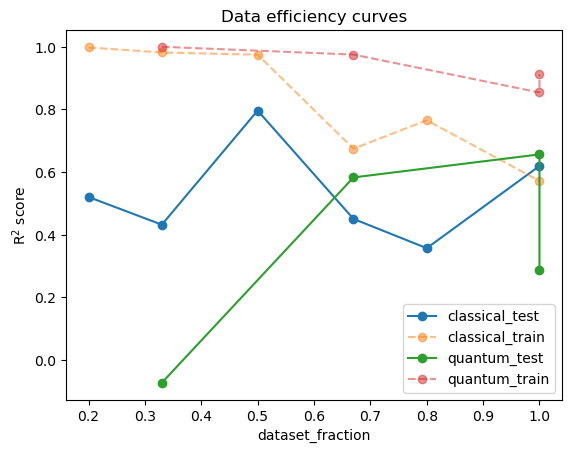

In [24]:
for model in df["model"].unique():
    inds = df["model"] == model
    x = df[inds]["dataset_fraction"]
    y1 = df[inds]["r2_test"]
    y2 = df[inds]["r2_train"]
    plt.plot(x, y1, "o-", label=model+"_test")
    plt.plot(x, y2, "o--", label=model+"_train", alpha=0.5)

plt.xlabel("dataset_fraction")
plt.ylabel("R$^2$ score")
plt.title("Data efficiency curves")
plt.legend()
plt.show()

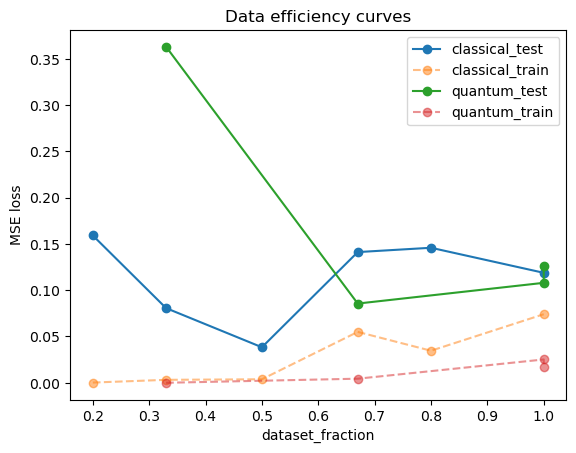

In [25]:
for model in df["model"].unique():
    inds = df["model"] == model
    x = df[inds]["dataset_fraction"]
    y1 = df[inds]["test_loss"]
    y2 = df[inds]["train_loss"]
    plt.plot(x, y1, "o-", label=model+"_test")
    plt.plot(x, y2, "o--", label=model+"_train", alpha=0.5)

plt.xlabel("dataset_fraction")
plt.ylabel("MSE loss")
plt.title("Data efficiency curves")
plt.legend()
plt.show()

## Averaging over bigger sample

optimize old code

In [1]:
import wandb
api = wandb.Api()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
prefix = "amirfvb/graphQNN"

In [2]:
api = wandb.Api()
runs = []
runs += list(api.sweep(prefix + "/38a36l2x").runs) # many classical runs
runs += list(api.sweep(prefix + "/l80nirxw").runs) # quantum runs
runs += list(api.sweep(prefix + "/lua2gj4f").runs) # many quantum runs
ids = [    
    "srv1c1lz",
    "be5skar9", # additional quantum runs
    ]
for id_ in ids:
    runs.append(api.run(f"{prefix}/{id_}"))

In [3]:

rows = []

for run in runs:
        # run = api.run(f"{prefix}/{run_.id}")
        # print(run_.config)
        # print(run.config)
        if "r2_test" not in run.summary:   # run is not finished
                continue
        rows.append({"model": run.config["model"],
                    "test_loss": run.history()['test_loss'].min(),
                    "train_loss": run.history()['loss'].min(),
                    "r2_test": run.summary["r2_test"],
                    "r2_train": run.summary["r2_train"],
                    "dataset_fraction": run.config.get("dataset_fraction", 1.0),
                    })
        


df = pd.DataFrame(rows)
df.sort_values(by="dataset_fraction", inplace=True)
df

,model,test_loss,train_loss,r2_test,r2_train,dataset_fraction
54,classical,0.130414,0.004509,0.524271,0.973822,0.2
58,classical,0.357756,0.206184,-0.035771,-0.000017,0.2
57,classical,0.347628,0.206259,-0.019908,-0.000023,0.2
56,classical,0.038673,0.001169,0.826412,0.995149,0.2
50,classical,0.077442,0.014624,0.722177,0.921787,0.2
...,...,...,...,...,...,...
3,classical,0.074183,0.082627,0.752020,0.479430,1.0
2,classical,0.074163,0.046815,0.681385,0.740451,1.0
1,classical,0.213085,0.071622,0.245825,0.593618,1.0
71,quantum,0.107957,0.025170,0.656377,0.854038,1.0


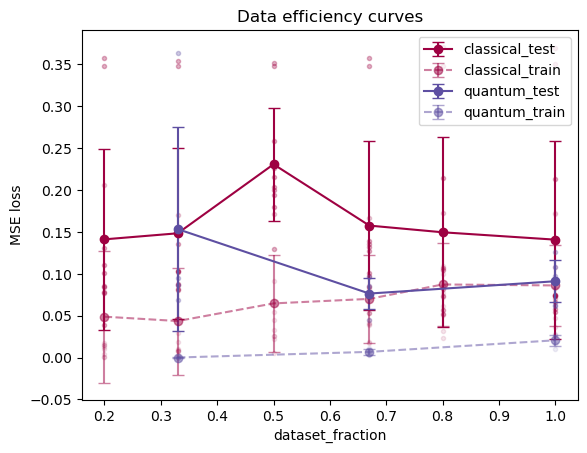

In [9]:
cmap = plt.colormaps.get("Spectral")
models = df["model"].unique()
colors = [cmap(i) for i in np.linspace(0, 1, len(models))]
for model, c in zip(models, colors):
    inds = df["model"] == model
    x = df[inds]["dataset_fraction"]
    fractions = x.unique()
    y1 = df[inds]["test_loss"]
    y2 = df[inds]["train_loss"]
    mid_s = []    
    error_s = []
    # mean values and standard distributions
    for y in [y1, y2]:
        mid = []    
        error = []
        for frac in fractions:
            mask = x == frac
            ys = y[mask]
            mid.append(np.mean(ys))
            error.append(np.std(ys))
        mid_s.append(mid)
        error_s.append(error)

    plt.errorbar(fractions, mid_s[0], yerr=error_s[0], capsize=4, fmt="o-", c=c, label=model+"_test")
    plt.plot(x, y1, ".", alpha=0.3, c=c)
    plt.errorbar(fractions, mid_s[1], yerr=error_s[1], capsize=4, fmt="o--", c=c, label=model+"_train", alpha=0.5)
    plt.plot(x, y2, ".", alpha=0.1, c=c)


plt.xlabel("dataset_fraction")
plt.ylabel("MSE loss")
plt.title("Data efficiency curves")
plt.legend()
plt.show()

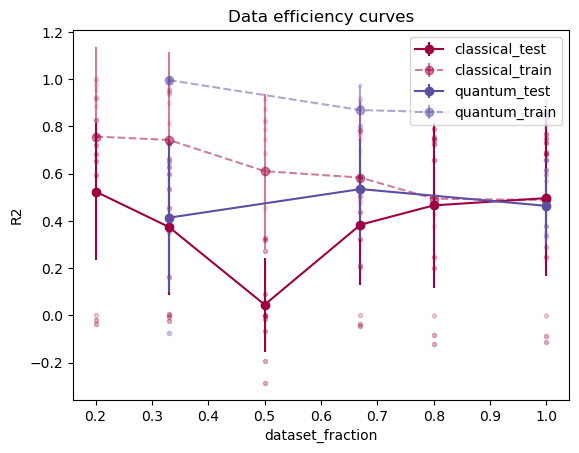

In [6]:
cmap = plt.colormaps.get("Spectral")
models = df["model"].unique()
colors = [cmap(i) for i in np.linspace(0, 1, len(models))]
for model, c in zip(models, colors):
    inds = df["model"] == model
    x = df[inds]["dataset_fraction"]
    fractions = x.unique()
    y1 = df[inds]["r2_test"]
    y2 = df[inds]["r2_train"]
    mid_s = []    
    error_s = []
    # mean values and standard distributions
    for y in [y1, y2]:
        mid = []    
        error = []
        for frac in fractions:
            mask = x == frac
            ys = y[mask]
            mid.append(np.mean(ys))
            error.append(np.std(ys))
        mid_s.append(mid)
        error_s.append(error)

    plt.errorbar(fractions, mid_s[0], yerr=error_s[0], fmt="o-", c=c, label=model+"_test")
    plt.plot(x, y1, ".", alpha=0.3, c=c)
    plt.errorbar(fractions, mid_s[1], yerr=error_s[1], fmt="o--", c=c, label=model+"_train", alpha=0.5)
    plt.plot(x, y2, ".", alpha=0.1, c=c)

plt.xlabel("dataset_fraction")
plt.ylabel("R2")
plt.title("Data efficiency curves")
plt.legend()
plt.show()